# Pest Detection Moddel Code
## Loading the dataset

12 classes:
['ants', 'bees', 'beetle', 'catterpillar', 'earthworms', 'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil']


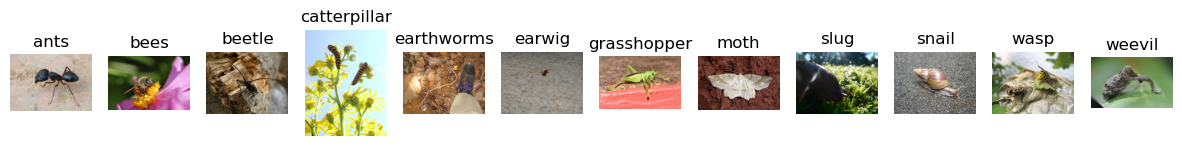

In [53]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

data_path = "imageset/test"
classNames = os.listdir(data_path)
classNames.sort()
print(len(classNames), "classes:")
print(classNames)

#print first images in each folder
fig = plt.figure(figsize=(15,15))
i = 0
for subfolder in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path, subfolder))[0]
    img_path = os.path.join(data_path, subfolder, img_file)
    img = mpimg.imread(img_path)
    fig.add_subplot(1, len(os.listdir(data_path)), i)
    plt.imshow(img)
    plt.title(subfolder)
    plt.axis('off')
plt.show()

## TendorFlow tools for model

In [42]:
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import models
from sklearn.metrics import classification_report, confusion_matrix


## Define CNN and image rules


In [43]:
#set image size
imgsize = (224, 224)
batch_size = 32

#data generator
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)

#training dataset
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=imgsize,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

#validation dataset
validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=imgsize,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

classes = train_generator.class_indices.keys()
print(classes)


Found 614 images belonging to 12 classes.
Found 148 images belonging to 12 classes.


dict_keys(['ants', 'bees', 'beetle', 'catterpillar', 'earthworms', 'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil'])


In [44]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=train_generator.image_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 26, 26, 128)     

## Train Model

In [45]:
#train the model 
history = model.fit(
    train_generator,
    steps_per_epoch= train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

Epoch 1/10
19/19 [==============================] - 52s 3s/step - loss: 2.4850 - accuracy: 0.1053 - val_loss: 2.4296 - val_accuracy: 0.1328
Epoch 2/10
19/19 [==============================] - 77s 4s/step - loss: 2.4305 - accuracy: 0.1628 - val_loss: 2.4180 - val_accuracy: 0.0938
Epoch 3/10
19/19 [==============================] - 77s 4s/step - loss: 2.3802 - accuracy: 0.1753 - val_loss: 2.3177 - val_accuracy: 0.1719
Epoch 4/10
19/19 [==============================] - 79s 4s/step - loss: 2.2936 - accuracy: 0.2182 - val_loss: 2.3321 - val_accuracy: 0.1953
Epoch 5/10
19/19 [==============================] - 69s 4s/step - loss: 2.1420 - accuracy: 0.2680 - val_loss: 2.3251 - val_accuracy: 0.1875
Epoch 6/10
19/19 [==============================] - 80s 4s/step - loss: 2.0359 - accuracy: 0.3093 - val_loss: 2.3229 - val_accuracy: 0.2734
Epoch 7/10
19/19 [==============================] - 89s 5s/step - loss: 1.8747 - accuracy: 0.3643 - val_loss: 2.3596 - val_accuracy: 0.2109
Epoch 8/10
19/19 [==

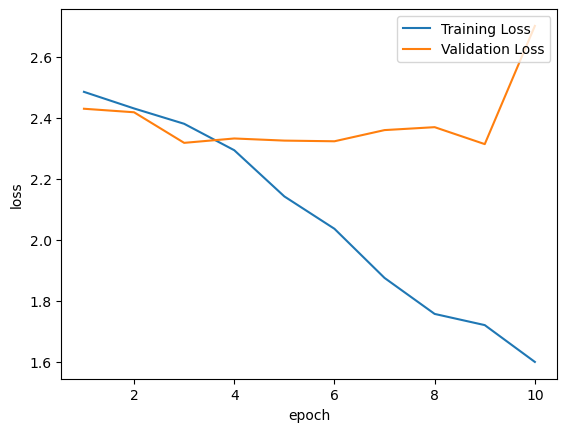

In [48]:
epoch_nums = range(1, 10 + 1)

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

1/1 [==============================] - 1s 814ms/step


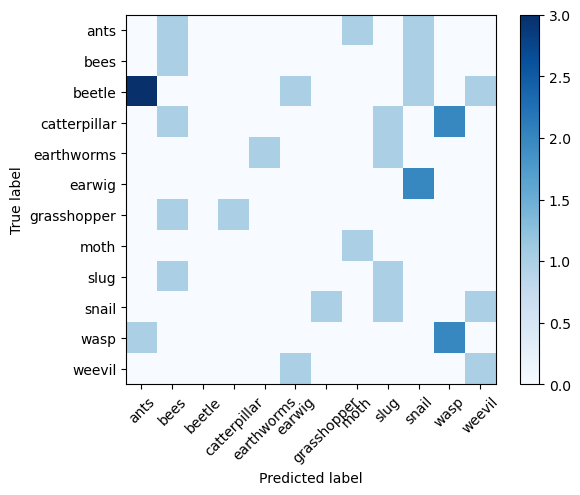

In [49]:
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# class prediction
class_prbability = model.predict(x_test)

predictions = np.argmax(class_prbability, axis=1)

true_label = np.argmax(y_test, axis=1)

confu_matrix = confusion_matrix(true_label, predictions)
plt.imshow(confu_matrix, interpolation='nearest',cmap= plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Save Model

In [50]:
#save trained model
modelname = 'PestClassifier.h5'
model.save(modelname)
del model
print('Model Saved As:', modelname)

Model Saved As: PestClassifier.h5
